## Exploring the Correlation Between Gini Coefficient and the Consumer Price Index (CPI)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px; /* title font size */
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px; /* content font size */
}
</style>


### **Introduction**
This Jupyter Notebook investigates the relationship between Gini Coefficient and the Consumer Price Index (CPI) across Asia, Europe, and North America.We aim to analyze historical data to discern how these two critical economic indicators interact, focusing on their correlation and possible implications. The analysis encompasses data collection, cleaning, and visualization, followed by statistical modeling to comprehensively understand their interconnected dynamics.

---
<h3 class="custom-heading"><b>Contributor(s)</b></h3>
<ul class="custom-spacing">
  <li>Code Originator(s): Ziji Tang</li>
  <li>Code Reviewer(s): Ziji Tang, Xiaohan Kuang, Hexuan Fan, Ananya Nimbalkar</li>
  <li>Code Reviser(s): Xiaohan Kuang</li>
</ul>

---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
  <li>This code chunk is responsible for introducing all the packages and processing an linear interpolation on Gini data and CPI data. An basic data cleaning is also done.</li>
  <li>The <code>LOCAL_PATH</code> variable is set to point to the data folder in the current working directory. </li> 
  <li>The <code>CLEANED_PATH</code> variable is set to point to the cleaned data folder in the current working directory. </li>
  <li>The <code>RAW_PATH</code> variable is set to point to the raw data folder in the current working directory. </li>
  <li>The <code>PLOT_PATH</code> variable is set to point to the plots folder in the current working directory. </li>
</ul>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import geopandas as gpd
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

LOCAL_PATH = os.getcwd() + '/data/'
CLEANED_PATH = LOCAL_PATH + '/cleaned/'
RAW_PATH = LOCAL_PATH + '/raw/'
PLOT_PATH = os.getcwd() + '/plots/'

# Load the Gini data
Gini_data = pd.read_excel(RAW_PATH + 'Gini.xlsx')

# Perform linear interpolation
year_columns = [str(year) for year in range(2000, 2023)]

# Apply interpolation to the year columns
Gini_data_interpolated = Gini_data.copy()

Gini_data_interpolated[year_columns] = Gini_data[year_columns].apply(pd.Series.interpolate, axis=1)

Gini_cleaned = Gini_data_interpolated[Gini_data.columns[0:4].tolist()+Gini_data.columns[44:].tolist()]
Gini_cleaned = Gini_cleaned.dropna(how='all', subset=Gini_cleaned.columns[4:])

# Save the interpolated data to a new CSV file
Gini_cleaned.to_csv(CLEANED_PATH + 'Interpolated_Gini_Data.csv')

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
This code chunk loads a world map from geopandas and merges it with the 2022 Gini data. The map includes a color bar for interpreting these values, categorizing Gini coefficient from 0.3 to 0.6. While red represents high income inequality, lighter color like yellow indicates lower income difference.
</ul>

---
<h3 class="custom-heading"><b>Contributor(s)</b></h3>
<ul class="custom-spacing">
  <li>Code Reviser(s): Xiaohan Kuang</li>
</ul>

---
<h3 class="custom-heading"><b>Edit Information</b></h3>
<ul class="custom-spacing">
  <li> Adjusted the map legend and size for a consistent and uniform appearance.
</ul>

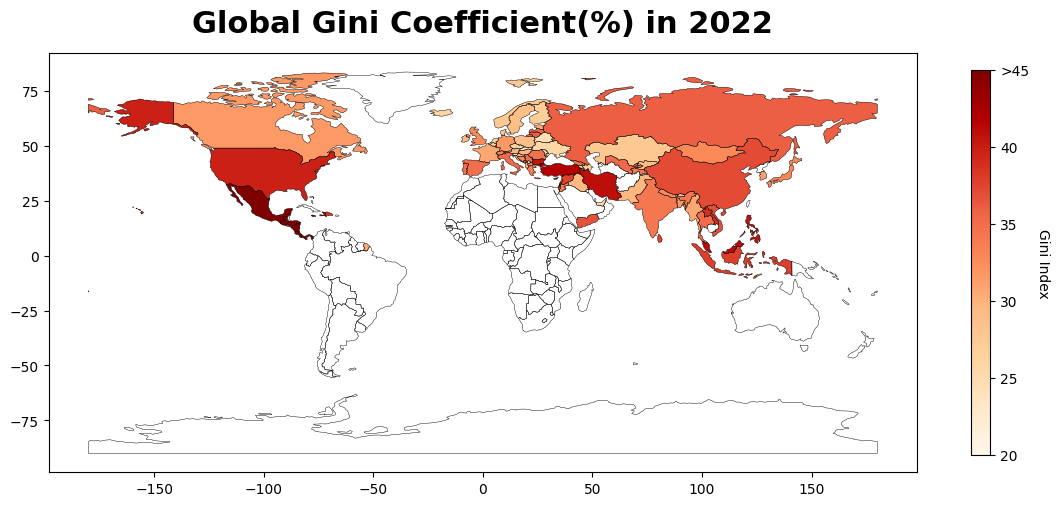

In [12]:
# Use the same CPI data for all 4 notebooks
CPI_data = pd.read_excel(CLEANED_PATH + 'CPI_cleaned.xlsx')
Gini_data = pd.read_csv(CLEANED_PATH + 'Interpolated_Gini_Data.csv')
# Load world map using Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gini_2022 = Gini_data[['Country Code', '2022']]

merged_data_gini_2022 = world.merge(gini_2022, left_on='iso_a3', right_on='Country Code', how='left')
# merged_data_gini_2022 = merged_data_gini_2022.loc[merged_data_gini_2022['continent'].isin(['Asia', 'Europe', 'North America'])]
merged_data_gini_2022.loc[~merged_data_gini_2022['continent'].isin(['Asia', 'Europe', 'North America']), '2022'] = np.nan

# Plotting the world map with Gini index data for 2022
fig, ax = plt.subplots(figsize=(14, 10))
plt.title('Global Gini Coefficient(%) in 2022', fontsize=22, pad=15, fontweight="bold")

merged_data_gini_2022.boundary.plot(ax=ax, linewidth=0.25, color='black')
merged_data_gini_2022.plot(column='2022', 
                           linewidth=0.1, 
                           ax=ax, 
                           vmin=20, 
                           vmax=45, 
                           cmap='OrRd', 
                           missing_kwds={'color': 'white'}, 
                           edgecolor='black')

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=20, vmax=45))
sm._A = [] 
cbar = fig.colorbar(sm, ax=ax, shrink=0.5)
cbar.set_label('Gini Index',  rotation=270, labelpad=15)
cbar.ax.set_yticklabels(['20', '25', '30', '35', '40', '>45'])
plt.savefig(PLOT_PATH + "Gini_2022.png", dpi=300, bbox_inches='tight')
plt.show()

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
This code chunk introduces function plot_cpi_vs_gini which generates a scatter plot to compare CPI and Gini coefficient across a specific continent. It plots countries with CPI on the x-axis and Gini coefficient on the y-axis.
</ul>

In [13]:
def plot_cpi_vs_gini(continent, cpi_data, gini_data, world_map):
    # Filter world map data for the specified continent
    continent_countries = world_map[world_map['continent'] == continent]

    # Reshape the data from wide to long format
    cpi_long = cpi_data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='CPI')
    gini_long = gini_data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Gini')

    # Filter out non-numeric rows (like indicator names)
    cpi_long = cpi_long[cpi_long['CPI'].apply(lambda x: isinstance(x, (int, float)))]
    gini_long = gini_long[gini_long['Gini'].apply(lambda x: isinstance(x, (int, float)))]

    # Merge CPI and Gini data
    merged_data = pd.merge(cpi_long, gini_long, on=['Country Name', 'Country Code', 'Year'])

    # Merge with continent data to filter by continent
    merged_data = pd.merge(merged_data, continent_countries[['name']], left_on='Country Name', right_on='name')

    # Creating the scatter plot
    plt.figure(figsize=(12, 6))
    countries = merged_data['Country Code'].unique()
    colors = np.linspace(0, 1, len(countries))
    color_map = dict(zip(countries, colors))

    sns.scatterplot(data=merged_data, x='CPI', y='Gini', hue='Country Code',  palette='viridis', legend=False, s=100, alpha=0.8, edgecolor=None)
    sns.regplot(data=merged_data, x='CPI', y='Gini', scatter=False, color='blue')


    plt.xlabel('CPI', fontsize=18)
    plt.ylabel('Gini Index', fontsize=18)
    plt.ylim(bottom=20)
    plt.title(f'Scatterplot of CPI vs Gini Index in {continent}', fontsize=22, pad=12, 
              fontweight="bold")
    if continent == 'Asia':
      caption = ("Figure: This scatter plot displays the relationship between the CPI and Gini coefficient for countries in " + continent + " from 2000 to 2022."
                 "\nA significant negative correlation is observed.")
    elif continent == 'Europe':
       caption = ("Figure: This scatter plot displays the relationship between the CPI and Gini coefficient for countries in " + continent + " from 2000 to 2022."
                  "\nA significant negative correlation is observed.")
    elif continent == 'North America':
       caption = ("Figure: This scatter plot displays the relationship between the CPI and Gini coefficient for countries in " + continent + " from 2000 to 2022."
                  "\nA significant postive correlation is observed.")
    plt.figtext(0.5, -0.1, caption, ha='center', va='center', fontsize=16, wrap=True)
    plt.grid(True)
    plt.savefig(PLOT_PATH + f"cpi_and_gini_scatterplot_in_{continent}.png", dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
This code chunk introduces function plot_cpi_and_Gini which generates two paralleled line plots to show the trends of Gini coefficient and CPI from 2000 to 2022 for a certain continent.
</ul>

In [14]:
def plot_cpi_and_Gini(continent, cpi_data, gini_data, world_map):
    # Filter out the countries in the specified continent
    continent_countries = world_map[world_map['continent'] == continent]['name']

    # Filtering the CPI and Gini data for the countries in the specified continent
    cpi_data_continent = cpi_data[cpi_data['Country Name'].isin(continent_countries)]
    gini_data_continent = gini_data[gini_data['Country Name'].isin(continent_countries)]

    # Years to consider
    years = [str(year) for year in range(2000, 2023)]

    # Calculating the median values for each year
    median_cpi = cpi_data_continent[years].median()
    median_gini = gini_data_continent[years].median()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(years, median_cpi, marker='o', color='red', label='Median CPI')
    plt.plot(years, median_gini, marker='o', color='blue', label='Median Gini Index')
    
    plt.axvline(x='2008', color='green', linestyle='--', linewidth=2)
    plt.axvline(x='2020', color='green', linestyle='--', linewidth=2)
    plt.text('2008', 40, 'Global Financial Crisis', color='green', fontsize=12, fontweight="bold")
    plt.text('2020', 40, 'Covid-19', color='green', fontsize=12, fontweight="bold")
    
    
    plt.xlabel('Year', fontsize=18)
    plt.ylabel('Median', fontsize=18)

    if continent == 'Asia':
      caption = ("Figure: This line plot compares the median CPI with Gini coefficient for countries in " + continent + " from 2000 to 2022."
                 "\nNo clear correlation is evident, however the effect of major global events in 2008 and 2020 can be observed.")
    elif continent == 'Europe':
       caption = ("Figure: This line plot compares the median CPI with Gini coefficient for countries in " + continent + " from 2000 to 2022."
                  "\nNo clear correlation is evident, however the effect of major global events in 2008 and 2020 can be observed.")
    elif continent == 'North America':
       caption = ("Figure: This line plot compares the median CPI with Gini coefficient for countries in " + continent + " from 2000 to 2022."
                  "\nNo clear correlation is evident, however the effect of major global events in 2008 and 2020 can be observed.")
    
    plt.figtext(0.5, -0.1, caption, ha='center', va='center', fontsize=16, wrap=True)
    plt.yticks(np.arange(0, 55, 10))
    plt.title(f'Median CPI and Gini Index in {continent} (2000-2022)', fontsize=22, pad=12, fontweight="bold")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.savefig(PLOT_PATH + f"median_cpi_and_gini_in_{continent}.png", dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
This code chunk did some data filtering to the CPI data and Gini data for further analysis, and by using the two functions of <code>plot_cpi_and_Gini</code> and <code>plot_cpi_vs_Gini</code>, It visualizes the relationship between CPI and Gini coefficient in Asia
</ul>

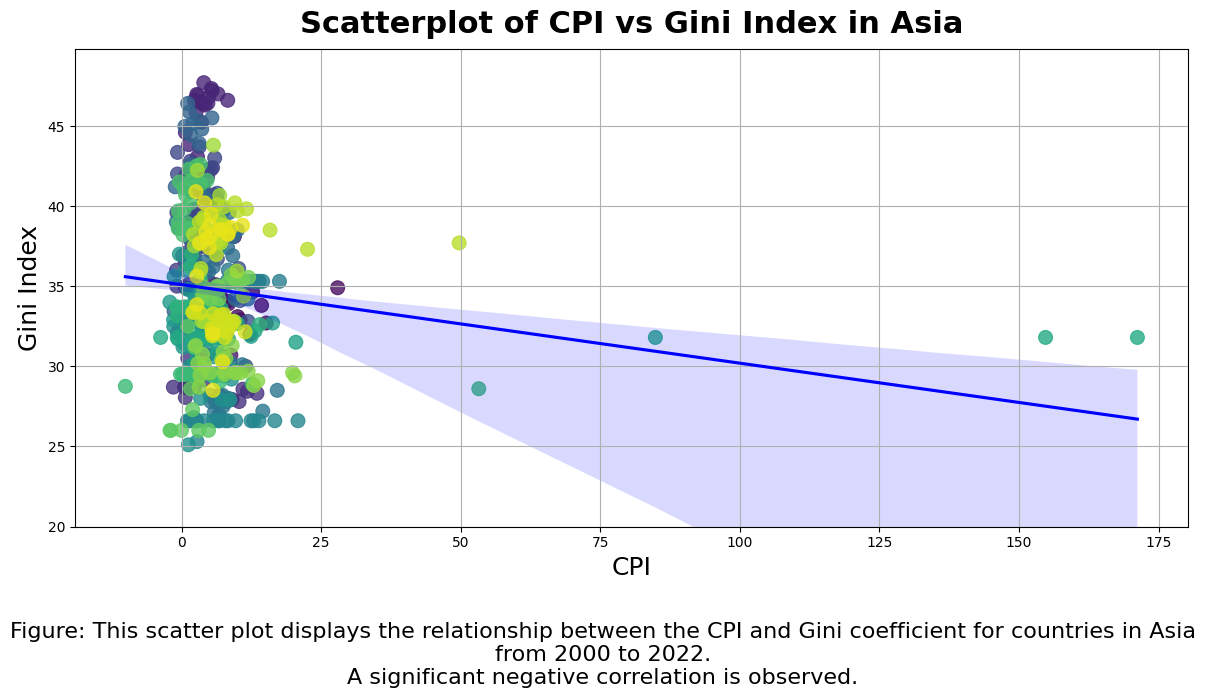

In [15]:
year_columns = [str(year) for year in range(2000, 2023)] 
cpi_filtered = CPI_data[['Country Name', 'Country Code'] + year_columns]
gini_filtered = Gini_data[['Country Name', 'Country Code'] + year_columns]
world_map_filtered = world[['name', 'continent']] 

plot_cpi_vs_gini('Asia', cpi_filtered, gini_filtered, world_map_filtered)

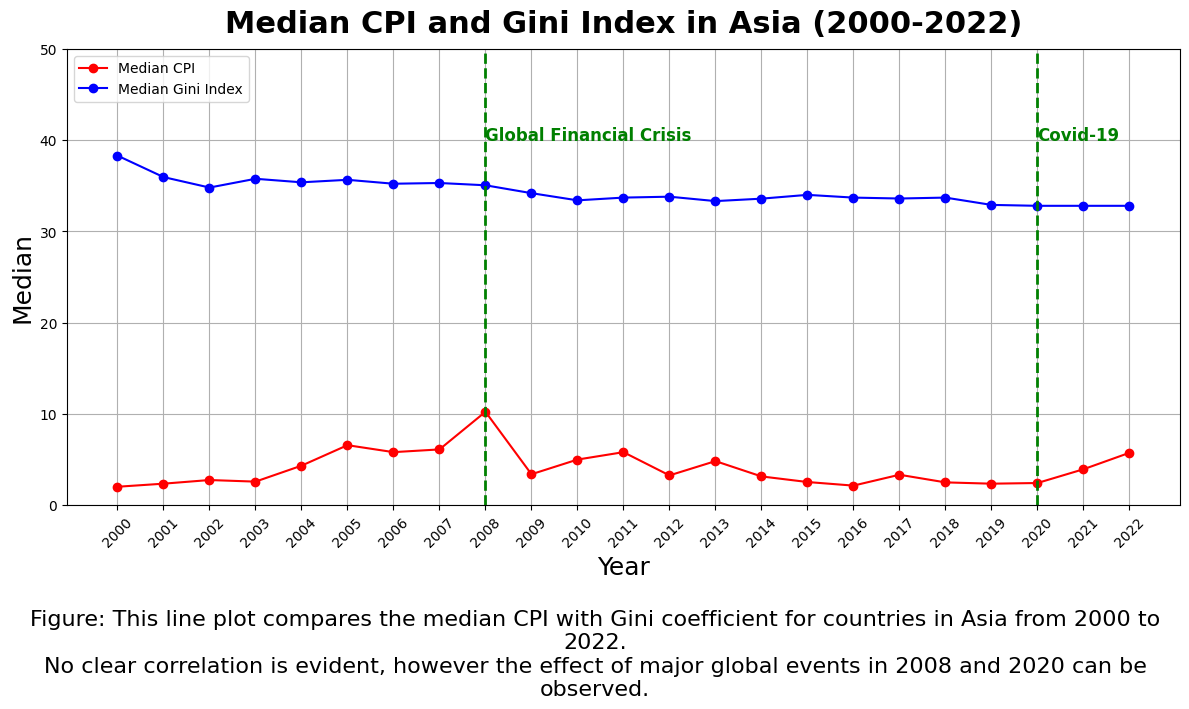

In [16]:
plot_cpi_and_Gini('Asia', cpi_filtered, gini_filtered, world_map_filtered)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
This code chunk did some data filtering to the CPI data and Gini data for further analysis, It visualizes the relationship between CPI and Gini coefficient in Europe
</ul>

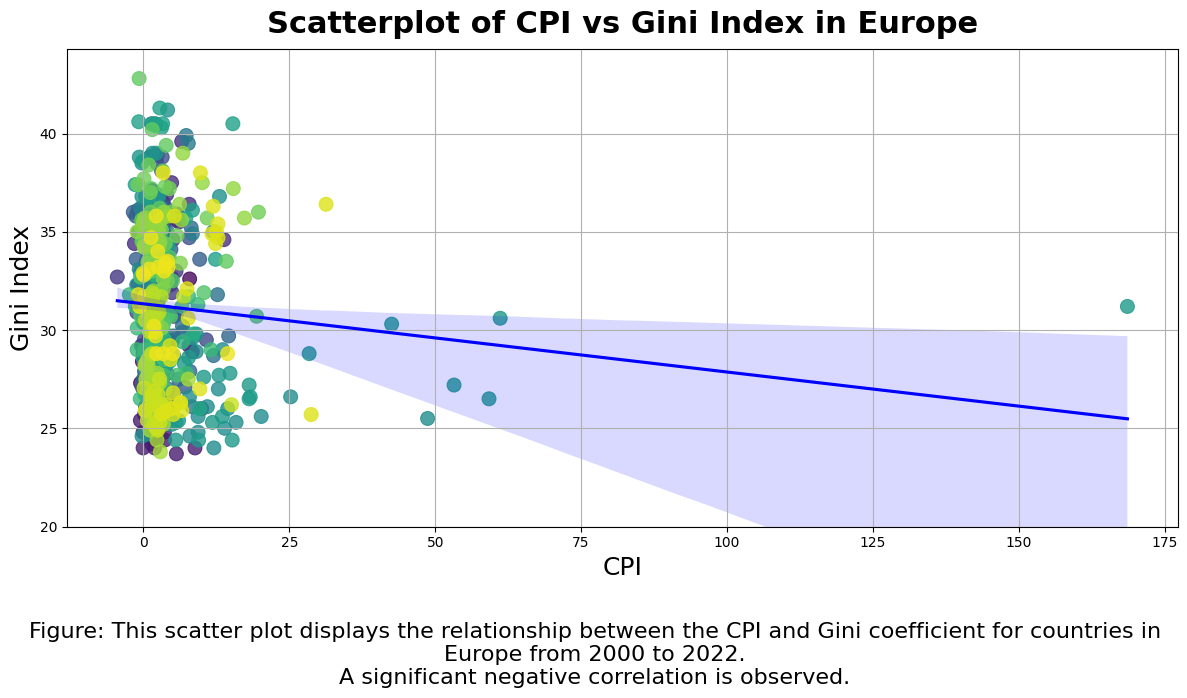

In [17]:
plot_cpi_vs_gini('Europe', cpi_filtered, gini_filtered, world_map_filtered)

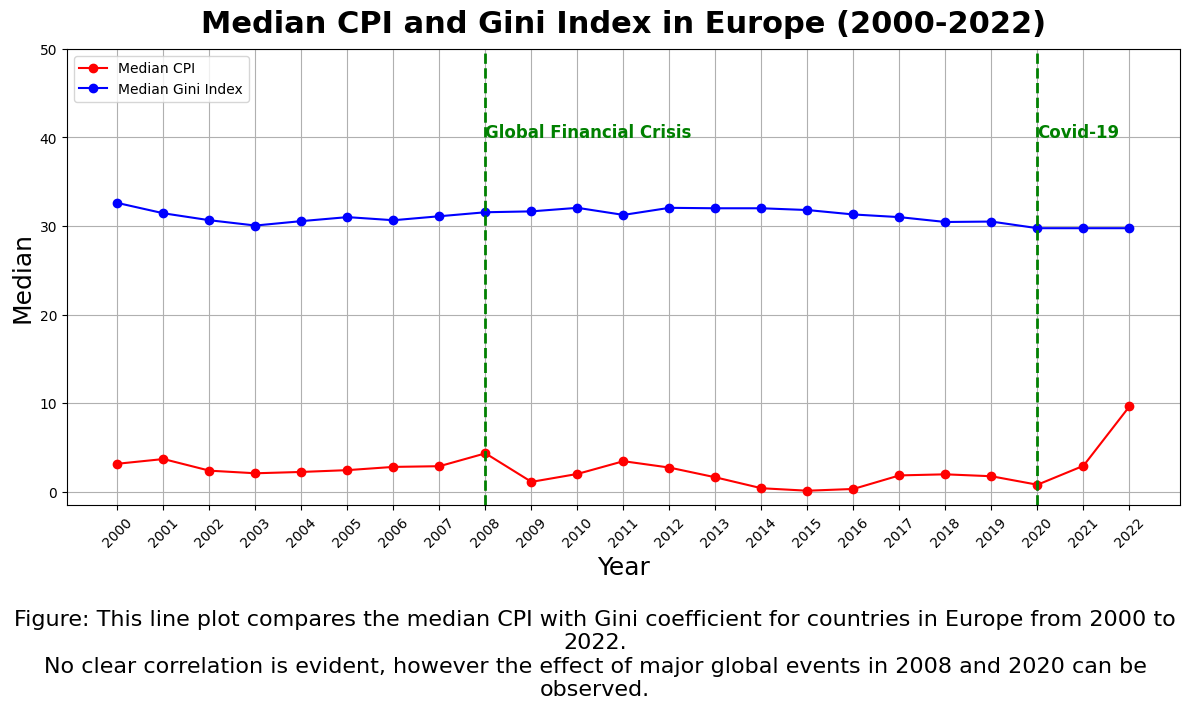

In [18]:
plot_cpi_and_Gini('Europe', cpi_filtered, gini_filtered, world_map_filtered)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
<h3 class="custom-heading"><b>Description</b></h3>
<ul class="custom-spacing">
This code chunk did some data filtering to the CPI data and Gini data for further analysis, It visualizes the relationship between CPI and Gini coefficient in North America
</ul>

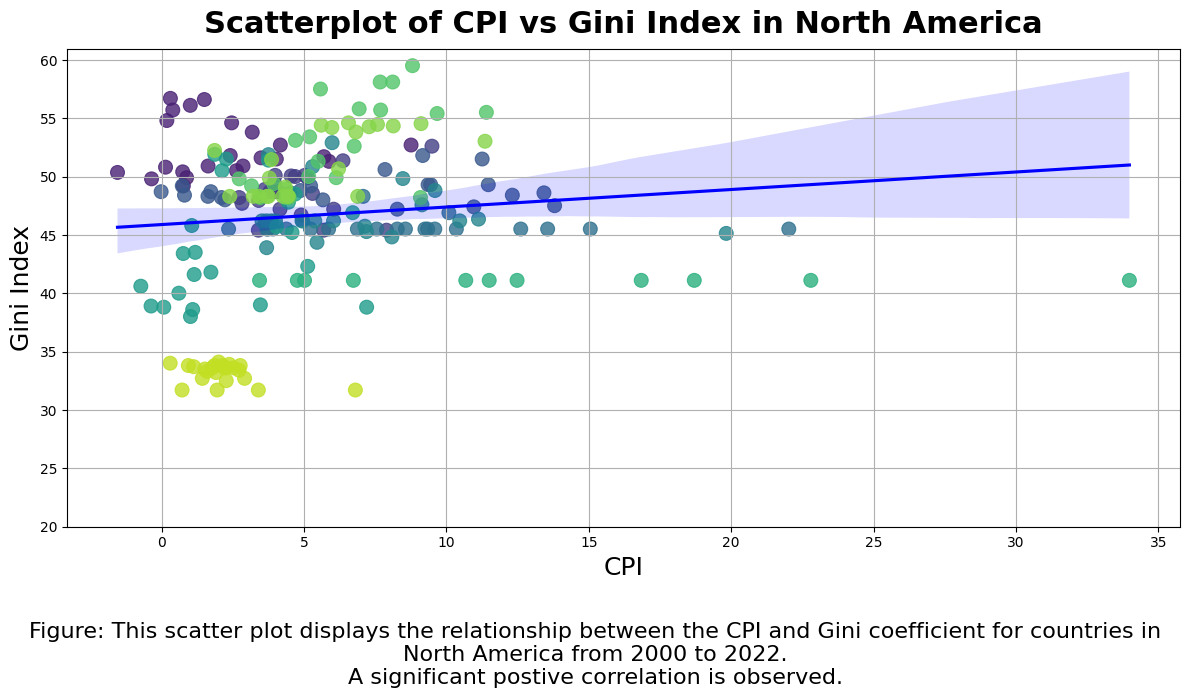

In [19]:
plot_cpi_vs_gini('North America', cpi_filtered, gini_filtered, world_map_filtered)

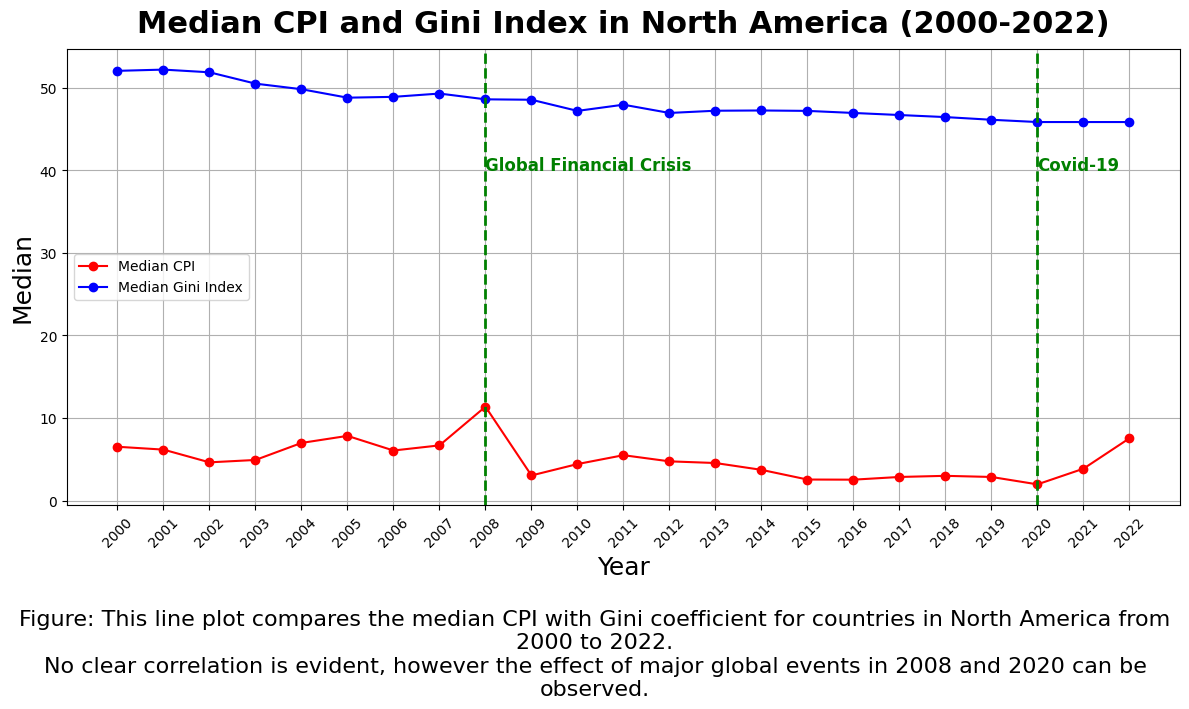

In [20]:
plot_cpi_and_Gini('North America', cpi_filtered, gini_filtered, world_map_filtered)

<style>
.custom-heading {
    margin-bottom: 10px; /* spacing between title and content */
    font-size: 20px;
}
.custom-spacing li{
    margin-top: 10px; /* spacing between list elements */
    font-size: 17.5px;
}
</style>
---
### **Phase Summary**
Our investigation into the relationship between the Gini coefficient and the Consumer Price Index (CPI) across various continents indicates significant differences across continents. There is generally speaking no correlation between Gini coefficient and CPI index. However, some unique patterns can be detected.

**Key Observations:**
1. **Regional Variations**: While there is a clear correlation among three continents that can be observed, the three scatter plots shows some other variations across continents. The CPI index in Asia and Europe stays still, however, Gini coefficient in these two continents are changing drastically in the past 20 years. Conversely, Gini cofficient in North America is comparatively stable, while the changes in CPI index is much more significant. Another notable feature is that data spots in North America seems to have a trend of clustering, which does't exist in the other two continents.
2. **Impact of Global Events**: In the line plots, A peek in CPI index can be observerd in 2008 and 2020 across all three continents, signifying The Great Recession and the COVID-19 pandemic. While Gini coefficient remains stable during these two events, different trends of CPI index is observed. Post-Recession there is an significant drop in CPI data, in contrast, after 2020, CPI data is rising sharply, especially in Europe.

**Possible Reasons for weak correlation:**

1, **Missing Values in Gini data**: Gini coefficient is a difficult index to compute, so that many data are missing. Too much interpolation will influence the accuracy of the analysis.

2, **Complex Influences on CPI**: CPI is an comprehensive index influenced by numurous factors, a multiple factors model is required to understand it more clearly.